We can prove that under assumption $ (H): \rho(|| \Phi ||) < 1, $ the norm kernel matrix satisfies the following equation $$ (C): || \Phi || = I - \Sigma^{1/2} M || c ||^{-1/2} \mbox{ with } M \in O_d (R) \mbox{ and } \int_0^\infty \phi^{ij} \ge 0$$

# Simulation of the Hawkes process with $d$=10

In [32]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from mlpp.hawkesnoparam.estim import Estim
import mlpp.pp.hawkes as hk
import admm_hawkes.simulation as simu
from mlpp.base.utils import TimeFunction

In [33]:
# simulation of Hawkes processes
d = 50
mu = 0.5 * np.ones(d)
mus = simu.simulate_mu(d, mu=mu)
blocks = [15,5,10,20]
L = []
for x in blocks:
    L.append(np.random.rand(x, x))
Alpha_truth = scipy.linalg.block_diag(*L) / 10
Beta = np.random.rand(d**2).reshape((d,d))

In [34]:
#Alpha_truth[2,8] += 0.2

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


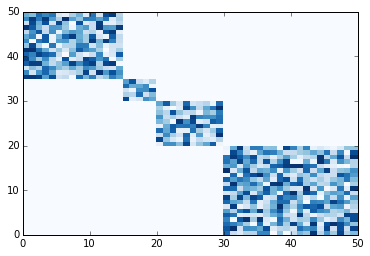

In [35]:
plt.pcolor(Alpha_truth[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [36]:
_, s, _ = np.linalg.svd(Alpha_truth)
print(s.max())
assert s.max() < 1, "Alpha_truth cannot generate a stable Hawkes process"

0.994442861001


In [37]:
kernels = [[hk.HawkesKernelExp(a, b) for (a, b) in zip(a_list, b_list)] for (a_list, b_list) in zip(Alpha_truth, Beta)]
h = hk.Hawkes(kernels=kernels, mus=list(mus))
h.simulate(10000)
estim = Estim(h, n_threads=8)

## Correlation matrix

In [38]:
from admm_hawkes.utils import corr_matrix
Corr = corr_matrix(estim)

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


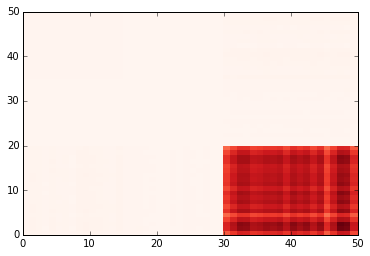

In [39]:
plt.pcolor(Corr[::-1],cmap=plt.cm.Reds)
plt.show()
plt.close()

# Estimation procedure

In [47]:
from admm_hawkes.solver import admm
import admm_hawkes.prox as prox
X0 = np.eye(d)
#X0 = np.ones(d**2).reshape(d,d)
rho = 0.01
maxiter = 50000

## objective = squared Frobenius

In [48]:
# main step
X_frob = admm(estim, prox.sq_frob, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  4.5982060423e-15
||X2 - X_3|| =  2.48835670734e-15
||U1|| =  0.180779744944
||U2|| =  0.131538221575
||U3|| =  7.28792687584e-15
||U4|| =  0.135138093764
||U5|| =  0.0257452622185


/Users/massil/Programmation/git/admm_hawkes/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/admm_hawkes/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/admm_hawkes/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/admm_hawkes/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


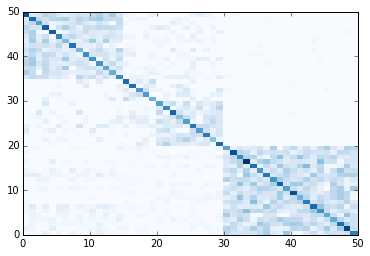

In [49]:
plt.pcolor(X_frob[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

## objective = \ell_1 norm

In [50]:
# main step
X_l1 = admm(estim, prox.l1, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  1.48800567937e-07
||X2 - X_3|| =  5.67351439643e-09
||U1|| =  2.53100626151
||U2|| =  0.719674337875
||U3|| =  0.0822526432084
||U4|| =  1.18076044407
||U5|| =  0.22091358101


/Users/massil/Programmation/git/admm_hawkes/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/admm_hawkes/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/admm_hawkes/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/admm_hawkes/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


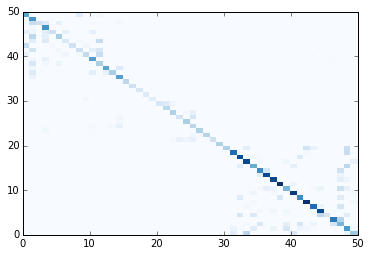

In [51]:
plt.pcolor(X_l1[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

## objective = nuclear norm

In [52]:
# main step
X_nuc = admm(estim, prox.nuclear, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  4.5002631034e-15
||X2 - X_3|| =  3.57587484836e-15
||U1|| =  0.820906495181
||U2|| =  0.652773840085
||U3|| =  0.043428369058
||U4|| =  0.66197176472
||U5|| =  0.148021718997


/Users/massil/Programmation/git/admm_hawkes/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/admm_hawkes/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/admm_hawkes/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/admm_hawkes/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


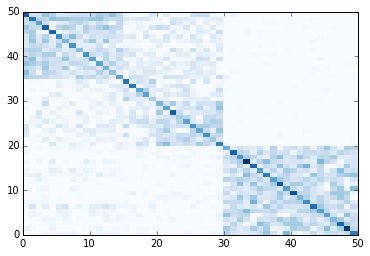

In [53]:
plt.pcolor(X_nuc[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()